---

# Modeling Population Flow Using Wireless Communication Information Reports

---

This notebook shows how to use Python code designed to process WiFi Information from the the University of Colorado Boulder campus. There are a number of different modules explained in this notebook.

## Data Overview: Campus WiFi

### Input

The Wifi Information for each building on the University of Colorado Boulder campus stored as `CSV` files.

### Data Format

The Wifi Information for each building on campus from \[2019-08-16 08:10:53\] to \[2021-05-25 06:57:08\]. The data is segmented into three folders: “UCB Wireless”, “UCB Guest”,  and “Eduroam”; each Folder contains data sets from each network . Every file is a CSV file named in the following format: \[Building Code\]_Extracted_Data_\[Start Date\]. 

Each `.csv` file contains the date and time in column zero and the active connected device count in column one. The devices recorded are connected to access points in building rooms, where most rooms have one access point and some have more than one. 

An example of file data is given below from the UCB Wireless network in Aden Hall. This first row of this example dataset would be read as “In Aden Hall, on August 16, 2019, at 8:10:53, there were eight devices connected to UCB Wireless”.

### EXAMPLE: ADEN HALL

| datetime |   devicecount  | 
| -------- |    --------    |
| 2019-08-16 08:10:53 | 8.0 |
| 2019-08-16 08:18:58 | 4.0 |
| 2019-08-16 08:28:17 | 5.0 |
| 2019-08-16 08:32:10 | 9.0 |
| 2019-08-16 08:37:38 | 6.0 |
| 2019-08-16 08:42:51 | 9.0 |
| 2019-08-16 08:47:59 | 5.0 |

Store `.csv` files at `BASE_DIR/data/input/WiFiData`.

Here is a list of buildings: 

```python

Community = ['ALUM','C4C','LIBR','REC','Rec','STAD','STSB','STTB','stad']

Residential = [ 'ADEN', 'ANDS', 'ARNT', 'BCAPA','BCAPB', 'BRKT', 'BUCK', 
                'CHEY', 'KITW', 'CROS', 'CKRL', 'FRND', 'HLET', 'DLYT', 
                'HLMS', 'LIBY', 'SMTH', 'REED', 'STRN', 'SWLL', 'WLRD',
                'WVC',  'WVE',  'WVN',  'WVRC', 'arnt', 'bker', 'kcen',
                'kitw', 'URES' 
                ]

EngineeringQuad = ['CKRL', 'ADEN', 'CROS', 'BRKT']

all_buildings = ['ADEN',  'AERO',  'ALMG', 'ALUM', 'ANDS', 'ARNT', 'ATLS', 
                 'BCAPA', 'BCAPB', 'BIOT', 'bker', 'BRKT', 'BUCK', 'C4C', 
                 'CARL',  'CASA',  'CASE', 'CHEY', 'CHMP', 'CKRL', 'CROS',
                 'DACR',  'DACR',  'DALW', 'DLC',  'DLYT', 'DUAN', 'ECAD', 
                 'ECCE',  'ECCR',  'ECEE', 'ECES', 'ECME', 'ECON', 'ECOT', 
                 'ECST',  'EDEP',  'EHSC', 'EKLC', 'ENVD', 'FRND', 'GOLD', 
                 'GUGG',  'HEND',  'HLET', 'HLMS', 'ITLL', 'kcen', 'KITW',
                 'KOBL',  'KTCH',  'LESS', 'LIBR', 'LIBY', 'LSRL', 'MUS',
                 'RAMY' , 'REC',   'REED', 'SEEC', 'SEEL', 'SMTH', 'SPSC',
                 'STAD',  'STRN',  'STSB', 'STTB', 'SWLL', 'UMC',  'URES',  
                 'VAC',   'WLAW',  'WLRD', 'WVC',  'WVE',  'WVN',  'WVRC'
                 ]
```

In [1]:
# Utility

all_buildings = [
    "ADEN",
    "AERO",
    "ALMG",
    "ALUM",
    "ANDS",
    "ARNT",
    "ATLS",
    "BCAPA",
    "BCAPB",
    "BIOT",
    "bker",
    "BRKT",
    "BUCK",
    "C4C",
    "CARL",
    "CASA",
    "CASE",
    "CHEY",
    "CHMP",
    "CKRL",
    "CROS",
    "DACR",
    "DALW",
    "DLC",
    "DLYT",
    "DUAN",
    "ECAD",
    "ECCE",
    "ECCR",
    "ECEE",
    "ECES",
    "ECME",
    "ECON",
    "ECOT",
    "ECST",
    "EDEP",
    "EHSC",
    "EKLC",
    "ENVD",
    "FRND",
    "GOLD",
    "GUGG",
    "HEND",
    "HLET",
    "HLMS",
    "ITLL",
    "kcen",
    "KOBL",
    "KTCH",
    "LESS",
    "LIBR",
    "LIBY",
    "LSRL",
    "MUS",
    "RAMY",
    "REC",
    "REED",
    "SEEC",
    "SEEL",
    "SMTH",
    "SPSC",
    "STAD",
    "STRN",
    "STSB",
    "STTB",
    "SWLL",
    "UMC",
    "URES",
    "VAC",
    "WLAW",
    "WLRD",
    "WVC",
    "WVE",
    "WVN",
    "WVRC",
]

num_of_buildings = len(all_buildings)
print(f"There are {num_of_buildings} buildings in the list.")

There are 75 buildings in the list.


In [3]:
residential_buildings = [
    "ADEN",
    "ANDS",
    "BCAPA",
    "BCAPB",
    "BRKT",
    "BUCK",
    "CHEY",
    "CROS",
    "CKRL",
    "FRND",
    "HLET",
    "DLYT",
    "HLMS",
    "LIBY",
    "REED",
    "SMTH",
    "STRN",
    "SWLL",
    "WLRD",
    "WVE",
    "WVN",
    "arnt",
    "bker",
    "kcen",
    "kitw",
]

community_building_list = ["ALUM", "C4C", "LIBR", "REC", "STAD", "STSB", "STTB"]

class_building_list = [
    "AERO",
    "ALMG",
    "ARNT",
    "ATLS",
    "BIOT",
    "CARL",
    "CASA",
    "CASE",
    "CHMP",
    "DACR",
    "DALW",
    "DLC",
    "DUAN",
    "ECAD",
    "ECCE",
    "ECCR",
    "ECEE",
    "ECES",
    "ECME",
    "ECON",
    "ECOT",
    "ECST",
    "EDEP",
    "EHSC",
    "EKLC",
    "ENVD",
    "GOLD",
    "GUGG",
    "HEND",
    "ITLL",
    "KOBL",
    "KTCH",
    "LESS",
    "LSRL",
    "MUS",
    "RAMY",
    "SEEC",
    "SEEL",
    "SPSC",
    "UMC",
    "URES",
    "VAC",
    "WLAW",
    "WVC",
    "WVRC",
]

num_of_buildings_residential = len(residential_buildings)
print(
    f"There are {num_of_buildings_residential} buildings in the residential buildings list."
)

num_of_buildings_community = len(community_building_list)
print(
    f"There are {num_of_buildings_community} buildings in the community buildings list."
)

num_of_buildings_class = len(class_building_list)
print(f"There are {num_of_buildings_class} buildings in the class buildings list.")

total_num_of_buildings = (
    num_of_buildings_residential + num_of_buildings_community + num_of_buildings_class
)
print(f"There are {total_num_of_buildings} buildings in total.")

There are 25 buildings in the residential buildings list.
There are 7 buildings in the community buildings list.
There are 45 buildings in the class buildings list.
There are 77 buildings in total.


In [2]:
# Section

engineering_building_list = [
    "ECAD",
    "ECCE",
    "ECCR",
    "ECEE",
    "ECES",
    "ECME",
    "ECON",
    "ECOT",
    "ECST",
]

midcampus_building_list = [
    "AERO",
    "SPSC",
    "LESS",
    "LSRL",
]

eastcampus_building_list = [
    "AERO",
    "SPSC",
    "LESS",
    "LSRL",
]

willvill_building_list = ["WLAW", "WVC", "WVRC"]

south_building_list = [
    "ALMG",
    "ARNT",
    "ATLS",
    "BIOT",
    "CARL",
    "CASA",
    "CASE",
    "CHMP",
    "DACR",
    "DACR",
    "DALW",
    "DLC",
    "DUAN",
    "EDEP",
    "EHSC",
    "EKLC",
    "ENVD",
    "GOLD",
    "GUGG",
    "HEND",
    "ITLL",
    "KOBL",
    "KTCH",
    "MUS",
    "RAMY",
    "SEEC",
    "SEEL",
    "UMC",
    "URES",
    "VAC",
    "WLAW",
    "WVC",
    "WVRC",
]


## Module 1: Processing

---

### Overview

The module includes two main classes:

1. `DataReader`: This class is responsible for reading and interpolating time series data from a CSV file. It is initialized with parameters that include the file path, start and end dates for the data to be considered, and the frequency at which to sample data.

2. `BuildingProcessor`: This class processes building data. It can process data for a specific building or for all buildings. It is initialized with parameters that include a `DataReader` object, building ID, CPU cores to use, and a boolean indicating whether to record time or check sparsity.

Other parameters can be set, such as the data directory, date range, building ID, CPU cores, and sampling frequency. The option to record the total execution time for performance testing, and to calculate the sparsity of the data.

---

### Importing the class

To use the classes in this module, the Python Code must be imported from the source code directory. From `~/src/python/processor/data_processor`, import `DataReader` and `BuildingProcessor`, then both of the classes can be used.

In [1]:
from src.python.processor.data_processor import DataReader, BuildingProcessor


### Select a date range

The `DataReader` class requires a date range to be passed. There is no reason to complicate this process - a well-known module, `datetime`, is used and the format is left as-is. Similar to the procedure used above, import the `datetime` class from the `datetime` module, then create two variables for the start and end dates you want to pass through the `DataReader` class.

Note that the format should be:

```python
datetime(2019,9,1)
```


In [ ]:
from datetime import datetime

start_date  = datetime(2019, 9, 1)
end_date    = datetime(2019, 10, 1)


### Using the objects

Now, we want to create an instance of the `data_reader` method within the `DataReader` class using the date range defined by the variables above. By doing this, we are reading the CSV files, then interpolating from the start date to the end date. The interpolated data is represented by the object called `data_reader`, which is passed through the `BuildingProcessor` class to create the `processor` object. These objects are like maps that point to the correct variation of the information we wish to use for our data analysis. 

While it might seem confusing, the convenience of doing this is that we can now call the `process_all_buildings` method in a single line, defining it as `network_data`. This is applying the interpolated date range to each of the buildings in parallel and storing a ton of information in a convenient dictionary format.

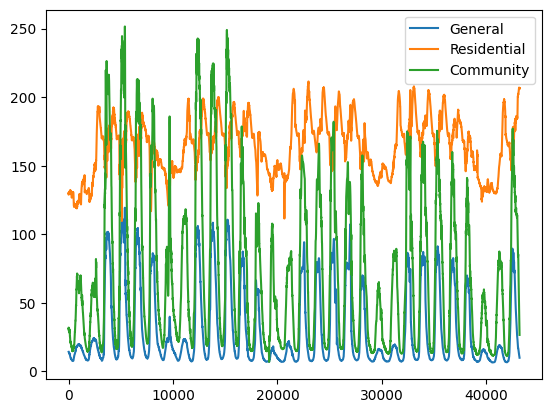

16.551 seconds using 10 CPU cores


In [ ]:
data_reader     = DataReader(start_date=start_date, end_date=end_date)
processor       = BuildingProcessor(data_reader)
network_data    = processor.process_all_buildings()


Again, we have one variable, `network_data`, with the data structure of a nested dictionary. In the next section, we are going to peel away at the layers of the nested format. 

### Printing the data

The outer dictionary has keys `Eduroam`, `UCBGuest`, and `UCBWireless`. Each of these keys maps to another dictionary, which in then maps to a Pandas DataFrame.

In [ ]:
outer_keys = list(network_data.keys())

print("\nAvailable Network Options and total building data available:\n")

for index, outer_key in enumerate(outer_keys, start=1):
    inner_keys = list(network_data[outer_key].keys())
    print(f"\t{outer_key}: \t (Total Buildings: {len(inner_keys)})")


Available Network Options and total building data available:

	Eduroam: 	 (Total Buildings: 77)
	UCBGuest: 	 (Total Buildings: 77)
	UCBWireless: 	 (Total Buildings: 77)
	Sum: 	 (Total Buildings: 77)
	Type: 	 (Total Buildings: 3)
	Campus: 	 (Total Buildings: 2)
	Average: 	 (Total Buildings: 3)


The output shows that `network_data` is a dictionary with 4 keys printed above and how many buildings there is data for. For one of the 4 keys, there are 77 buildings, a sample of 3 buildings and the first 3 rows of data look like this:

In [ ]:
print("\nFor each Network Option, the building data looks like:")

count = 0
for outer_key in outer_keys:
    inner_keys = list(network_data[outer_key].keys())
    for location in inner_keys:
        count += 1
        if count > 3:
            break
        print(f"\n{count}. {location}")
        print(network_data[outer_key][location].head(3))
    if count > 3:
        break


For each Network Option, the building data looks like:

1. ATLS
             datetime  devicecount
0 2019-09-01 00:03:32     0.854531
1 2019-09-01 00:04:32     0.858438
2 2019-09-01 00:05:32     0.862306

2. UMC
             datetime  devicecount
0 2019-09-01 00:03:32     3.678611
1 2019-09-01 00:04:32     3.538488
2 2019-09-01 00:05:32     3.428862

3. DLC
             datetime  devicecount
0 2019-09-01 00:03:32     1.814027
1 2019-09-01 00:04:32     1.943510
2 2019-09-01 00:05:32     2.061522


To access data in this nested structure, you would first call the outer dictionary with the desired key, then call the inner dictionary with its key, and finally access the DataFrame.

#### Example

In [ ]:
print(f"Number of network options: {len(network_data)}\n")

data = network_data["Eduroam"]

print(f"Number of building options: {len(data)}")

Number of network options: 7

Number of building options: 77


In [ ]:
print("\nAccessing 'AERO' under 'Eduroam':\n")
print(data["AERO"].head(3))


Accessing 'AERO' under 'Eduroam':

             datetime  devicecount
0 2019-09-01 00:03:32     3.026070
1 2019-09-01 00:04:32     3.027370
2 2019-09-01 00:05:32     3.028653


4. Call both columns of data for the Aerospace building like this:

In [ ]:
print("\nAccessing 'datetime' under 'AERO' in 'Eduroam':\n")
print(data["AERO"]["datetime"].head(3))


Accessing 'datetime' under 'AERO' in 'Eduroam':

0   2019-09-01 00:03:32
1   2019-09-01 00:04:32
2   2019-09-01 00:05:32
Name: datetime, dtype: datetime64[ns]


In [ ]:
print("\nAccessing 'devicecount' under 'ATLS' in 'Eduroam':\n")
print(data["ATLS"]["devicecount"].head(3))


Accessing 'devicecount' under 'ATLS' in 'Eduroam':

0    0.854531
1    0.858438
2    0.862306
Name: devicecount, dtype: float64



### Optional Parameters

The simplest use of the `DataProcessor` class is to pass no values, which is shown above. The following section demonstrates options for improving performance of the processing procedure and initialization of several parameters.

---
**Parameter List**

1. `start_date` and `end_date`: The start and end dates for data processing.
2. `building_id`: A building ID for processing data related to a specific building.
3. `cpu_cores`: The number of CPU cores to use for parallel processing. The maximum value should not exceed the total number of CPU cores available on your machine.
4. `sample_freq`: The time (in minutes) between each interpolated point.
5. `record_time=True`: For performance testing only. If not set to `True`, the default behavior is...

---

First, create a dictionary of all network data:

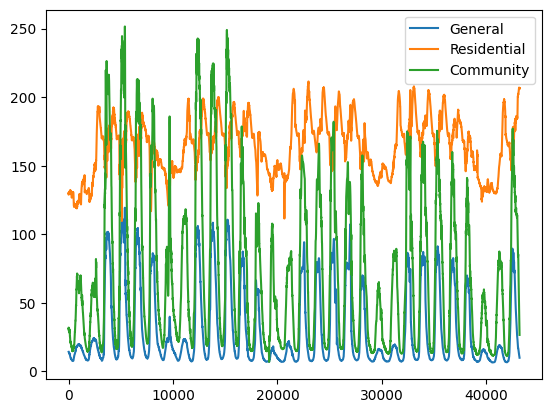

15.897 seconds using 10 CPU cores


In [14]:
processor = BuildingProcessor(data_reader)
network_data = processor.process_all_buildings()

Set `cpu_cores` based on the available cores on your machine for optimal performance.

In [ ]:
processor = BuildingProcessor(data_reader, cpu_cores=10)
network_data = processor.process_all_buildings()

In [ ]:
processor = BuildingProcessor(data_reader, cpu_cores=1)
network_data = processor.process_all_buildings()

Set `sample_freq` if you want to interpolate between points at an interval that is different than `3Min`.

data_reader = DataReader(sample_freq="5Min")
processor = BuildingProcessor(data_reader)

network_data_frequency = processor.process_all_buildings()
data_frequency = network_data_frequency["Eduroam"]

print()
print(data_frequency["ATLS"].head(3))

data_reader = DataReader(sample_freq="2Min")
processor = BuildingProcessor(data_reader)

network_data_frequency = processor.process_all_buildings()
data_frequency = network_data_frequency["Sum"]

print()
print(data_frequency["ATLS"].head(3))

5. The `record_time` parameter is for performance testing using in the next section.

## Class: SpeedTest

This `DataProcessor` module also contains the `SpeedTest` class, which is designed to measure and visualize the performance of the processing procedure shown in this notebook. The `SpeedTest` class is primarily used to record the time taken to process data using different numbers of CPU cores and interpolation between several different sample frequencies. It demonstrates the performance improvement gained by implementing a parallel processing strategy.

The class runs the procedure for core, a defined amount of CPU cores. In this case, `cpu_cores = [ 1,  3,  5,  7,  8 ]`, since my computer has 10 cores. I was originally ranging from 1 to the maximum number of CPU cores available (10), but was seeing a longer run time on 10 cores compared to 8 cores. This turned out to be because the Apple M1 Pro has 8 "performance" cores and 2 "efficiency " cores. There isn't much information on the difference between these processors. The execution is performed for interpolation between points with each of the following sample frequencies: `['15Min','10Min','5Min','2Min']`.

The total time taken for each run is recorded into a Python dictionary and then plotted. This provides a visual representation of the performance increase when using multiple CPU cores. The time data is also converted to a Pandas DataFrame before being returned by the function.

### Usage

Here's an example of how to use the `SpeedTest` class to measure the execution time of the `DataProcessor` class with varying numbers of CPU cores and sample frequencies:

In [ ]:
from src.python.processor.data_processor import SpeedTest

# config1
# cpu_cores = [1, 2, 3, 4, 5, 6, 7, 8]
# sample_freqs = ["15Min", "10Min", "6Min", "2Min", "1Min"]

# config2 (quicker run-time)
# cpu_cores = [1, 3, 5, 8]
# cpu_cores = [10]
# sample_freqs = ["20Min"]
# sample_freqs = ["10Min", "6Min", "2Min"]

# speed_test = SpeedTest(cpu_cores, sample_freqs)

# speed_test.run()
# speed_test.plot_results()

In this example, the `BuildingProcessor` is initialized with a `DataReader` object, the number of CPU cores to use, and the `record_time` parameter set to `True`. The `process_all_buildings` method is then called to process the data and measure the execution time. The results are stored in the `time_results` dictionary and plotted using matplotlib.

### Result

The processing of data interpolation for 144 points across 77 buildings was significantly expedited by utilizing all 10 cores on a Apple M1 Pro with a 10-core processor and 32 gb of unified memory. The time required for this operation was reduced from 5.2 seconds to 1.3 seconds, demonstrating the efficiency of parallel processing independent CSV files, but it isn't a massive jump in performance. This improvement in performance uses a straightforward strategy where each processing unit operates on a `.csv` file independently, as the memory does not depend on each other. By default, the system will utilize the maximum number of CPU cores available. However, if any issues arise, one can manually set `cpu_cores = 1` to only execute one process at a time.

### Future Work

This notebook presents a speed-up for the processing procedure on my laptop. Running this on an HPC cluster would increase the performance but would not be needed until there was significantly more data to interpolate and load.

# Module 2: Time-Series Visualization with Python

This Jupyter notebook demonstrates the use of a comprehensive data visualization tool designed to plot data related to device counts over time across different networks in a university setting. The tool is implemented as a Python module that imports various libraries for data manipulation, visualization, multiprocessing, and more.

## The `DataVisualization` Module.

The module contains the classes:

1. `DataVisualizer`: This class fetches and processes the data, creates the plots, and saves them. It takes in parameters such as the interval of time, output_path, and the optional parameters: normalize and show_plot. The main function of this class is to plot events on time series data.

2. `MultiPlotter`: This classes function is to plot multiple buildings concurrently using multiprocessing. The parameters building_list, index_values can be changed and two optional parameters: events and n_jobs can be set buy the user. The method `plot` makes runs a script that generates and saves the time series plots locally for all the buildings.

3. `CampusPlotter`: This class is used to plot data for the sum of all buildings on campus. It takes in parameters to choose whether the plot should be shown or if the data should be normalized before plotted.


The module also contains helper functions and constants for file paths and directories. It uses multiprocessing to speed up the plotting process and matplotlib for creating the plots. The plots are saved as .png files in specified directories. The module also handles exceptions and errors during the data fetching, processing, and plotting stages. It uses pandas for data manipulation, matplotlib for plotting, and sklearn for normalization of data. It also handles exceptions and errors during the data fetching, processing, and plotting stages.

## Example.

### IMPORTING THE MODULE 

To visualize the data, import the `DataProcessor` and `DataVisualizer` modules from this projects library. To summarize, it reads and processes the CU Boulder Wireless Network Information stored as CSV files into a Python dictionary. The date range is set one time for all plots in this Notebook by passing the `datetime` objects as `start_date` and `end_date` parameters in the `DataReader` class. 

In [17]:
from src.python.time_series.creator import VisualizerCreator

In [18]:
from src.python.processor.data_processor import DataReader

from datetime import datetime

start_date = datetime(2019, 11, 2)
end_date = datetime(2019, 12, 2)
data_reader = DataReader(start_date=start_date, end_date=end_date)


### INITIALIZING OBJECTS

Since there are 77 buildings in the dataset, they can be summed to create one line. The column vector has the same sample spacing as the plots above and the time series of the campus-level view.

All of this is managed by the `VisualizerCreator` class. This class will take a start and end date as parameters in the format YYYY-MM-DD (Example: "2019-09-10") and takes care of all the other formatting needed to create 3 different plots for each of the 77 buildings and 3 plots for the campus level view.

In [ ]:
from src.python.time_series.creator import VisualizerCreator

start_date = "2019-10-1"
end_date = "2019-10-31"

try:
    creator = VisualizerCreator(start_date, end_date)
    visualizers = creator.create_visualizers()
    campus_plotters = creator.create_campus_plotters()
except Exception as e:
    print(f"An error occurred: {e}")
else:
    (
        chunks,
        networks,
        normalized,
        normalized_chunks,
        two_networks_chunks,
        two_networks,
    ) = visualizers.values()
    (
        campus_plotter1,
        campus_plotter2,
        campus_plotter_normalized,
        dorm_average,
        general_average,
        community_average,
    ) = campus_plotters.values()


def time_series_plotter(name):
    networks.plot_single(name)
    chunks.plot_single(name)
    two_networks.plot_single(name)
    two_networks_chunks.plot_single(name)
    normalized.plot_single(name)
    normalized_chunks.plot_single(name)


def campus_plotters():
    campus_plotter1.plot_data()
    campus_plotter2.plot_data()
    campus_plotter_normalized.plot_data()
    campus_plotter_normalized.plot_phase_space()
    dorm_average.plot_data()
    general_average.plot_data()
    community_average.plot_data()

Now that an instance of this class has been created, we have an object we can do stuff with. Naturally, plotting is the first step in order to visualize the data. 

We import the `DataVisualization` module, which is where the code is stored as classes. The `DataVisualizer` class can be used to create another abstract object called `visualizer` by sending the `data_processor` object though the class. The `DataVisualizer` class uses a method called `__init__` to initializes the class with several parameters including `data_processor`, `data_reader`, `intervals`, `output_path`, `normalize`, and `show_plot`. It also sets up some default values and lists of buildings categorized by their location on campus for sorting these plots in the output directory (instead of dumping 77 plots in one folder).

### CHOOSE A BUILDING TO PLOT DATA FOR

A list of buildings can be passed and each will be plotted and shown, but that's a lot of plotting on one page. It's easier to just define `name` as another building, then run everything after this point.

For the three building-level plots, we can:

1. Plot all three networks on one plot

2. Slice the three networks into 5 chunks, shown in one large figure of subplots

3. Plot the normalized network aggregate (sum of the three networks shown in 1. and 2.)

```python
name = "WLAW"
```

In [ ]:
name = "WLAW"

networks.plot_single(name)
chunks.plot_single(name)


## Plotting a single building.

We have specified a date range, have read the data on that range, and it was stored as a  dictionary above. All we have to do is call the plotting method `plot_data` along with the specific instance created above, and we create a plot showing the time series plot of the device count on campus during the specified date range. The `plot_single` method uses all the above methods to fetch data, create a plot, plot the data and events, and save the plot. It also handles normalization of data if required.

In the next section, a big time series plot that splits a date range into (connected) chunks and can be built for each building we have data for. Recall that there are 77 buildings and a list was given at the top of the page. Events are stored in a dictionary and imported directly into the class by default and a parameter can be passed to turn this feature off. A few sample events are plotted as grey boxes on the following building plots. These plots can be made smaller and the "chunking" method can be set to anything, even 1, but these are made to display as much of the data as possible in an easy, interpretable format for data exploration.

### SPLITTING THE PLOT INTO CHUNKS

# "URES", ... No data
# "ARNT", ... No data
# "WVC", ... does not look like dorm
# "WVRC", ... check again

residential_buildings = [
    "ADEN",
    "ANDS",
    "BCAPA",
    "BCAPB",
    "BRKT",
    "BUCK",
    "CHEY",
    "CROS",
    "CKRL",
    "FRND",
    "HLET",
    "DLYT",
    "HLMS",
    "LIBY",
    "REED",
    "SMTH",
    "STRN",
    "SWLL",
    "WLRD",
    "WVE",
    "WVN",
    "arnt",
    "bker",
    "kcen",
    "kitw",
]

community_buildings = [
    "ALUM",
    "C4C",
    "LIBR",
    "REC",
    "STAD",
    "STSB",
    "STTB",
]

admin_buildings = [
    "AERO",
    "ALMG",
    "ARNT",
    "ATLS",
    "BIOT",
    "CARL",
    "CASA",
    "CASE",
    "CHMP",
    "DACR",
    "DALW",
    "DLC",
    "DUAN",
    "ECAD",
    "ECCE",
    "ECCR",
    "ECEE",
    "ECES",
    "ECME",
    "ECON",
    "ECOT",
    "ECST",
    "EDEP",
    "EHSC",
    "EKLC",
    "ENVD",
    "GOLD",
    "GUGG",
    "HEND",
    "ITLL",
    "KOBL",
    "KTCH",
    "LESS",
    "LSRL",
    "MUS",
    "RAMY",
    "SEEC",
    "SEEL",
    "SPSC",
    "UMC",
    "URES",
    "VAC",
    "WLAW",
    "WVC",
    "WVRC",
]

for names in community_buildings:
    time_series_plotter(names)


### NETWORK AGGREGATE AND NORMALIZATION

Now, we use the same method used above and will see the data is now normalized and lives between $0$ and $1$. This is helpful for computation we want to do with the objects.

In [ ]:
normalized.plot_single(name)
normalized_chunks.plot_single(name)


## Plotting Campus Data.

We need to create a new `CampusPlotter` object where the data is normalized. Do this passing `normalize = True` as a parameter with the same data object used in the plot above.

### BUILDING AGGREGATE & NORMALIZATION OF THE BUILDING AGGREGATE

In [ ]:
from src.python.time_series.creator import VisualizerCreator

start_date = "2019-10-1"
end_date = "2020-1-1"

try:
    creator = VisualizerCreator(start_date, end_date)
    campus_plotters = creator.create_campus_plotters()
except Exception as e:
    print(f"An error occurred: {e}")
else:
    (
        campus_plotter1,
        campus_plotter2,
        campus_plotter_normalized,
        dorm_average,
        general_average,
        community_average,
    ) = campus_plotters.values()


def campus_plotters():
    campus_plotter1.plot_data()
    campus_plotter2.plot_data()
    campus_plotter_normalized.plot_data()
    campus_plotter_normalized.plot_phase_space()
    dorm_average.plot_data()
    general_average.plot_data()
    community_average.plot_data()

In [ ]:
campus_plotters()

In [ ]:
dorm_average.plot_data()
general_average.plot_data()
community_average.plot_data()


## Plotting All Buildings Using Parallel Processing.

A list of the buildings that will be processed, plotted, and saved, then the building name of each is printed after it is saved and before the figure is closed to let the user know the path to it's location. The path can be clicked on and the `.png` file will open in another window.

The code to run this process is provided here:

```python

visualizer = DataVisualizer(data_processor)
multi_plotter = MultiPlotter(visualizer)

multi_plotter.plot()
```


### SPEED-UP ANALYSIS

Analysis of time spend processing the data in parallel, then plotting the time series plots for 4 networks in parallel using 10 CPU cores on my Apple M1 Pro is left to future work. It would probably take most people longer to process 1 plot on 1 core than my computer processes and plots all 77. The processing speed isn't too important when plotting these time-series plots on one page. 


## Plotting the Phase Space.

The next step in this project is to work on this phase space plot. I have run this code on normalized data and not normalized data for all of campus. Sometimes it looks like a little spiral or circle, usually for the entire campus. A phase space plot forms a diagonal line from 0 to 1 suggests the system has a linear relationship between the state of the system at time $t_1$ and time $t_2$. The slope of the line would be positive when the device count was increasing, it indicates that the number of devices is increasing; if the slope is negative, it indicates that the number of devices is decreasing. This phase space plot only shows the relationship between the state of the system at two consecutive time points, and does not capture the full dynamics of the system. This still in progress...


## Sparsity

Sparsity is a concept that refers to matrices or vectors that are comprised mostly of zero values. The sparsity of a matrix can be quantified with a score, which is the number of zero values in the matrix divided by the total number of elements in the matrix.

A vector is said to be $k$-sparse if exactly $k$ values are non-zero. A matrix is considered sparse if most of the elements are zero. There is no strict definition regarding the proportion of zero-value elements for a matrix to qualify as sparse but a common criterion is that the number of non-zero elements is roughly equal to the number of rows or columns.

More precisely, if $A$ is a matrix of size $m \times n$ and $Z$ is the number of zero elements in $A$, then the sparsity $S$ is given by:

$$
S = Z / (m * n)
$$

This implies that a higher sparsity value indicates that the matrix has more zero elements, while a lower sparsity value indicates fewer zero elements.

To calculate the sparsity of a matrix in Python, you can count the number of non-zero elements and divide by the total size of the matrix:

In [25]:
import numpy as np


def calculate_sparsity(A):
    sparsity = (A.size - np.count_nonzero(A)) / float(A.size)
    return sparsity

The concept of sparsity is important because it can lead to computational savings. Many large matrix problems that occur in data science practice are sparse. Sparse matrices require less memory to store because the zero elements do not need to be stored. We can take advantage of computational operations can skip the zero elements, leading to faster computations 

## Density

The sparsity of a matrix is defined as the number of zero-valued elements divided by the total number of elements. Conversely, the density of a matrix is defined as the number of non-zero elements divided by the total number of elements. Therefore, you can see how the sparsity and density of a matrix are directly related. Specifically, the sparsity of a matrix is equal to 1 minus its density.

To compute this:

## What can we do with this?

The result above is a measure of how many the samples in each building's dataset is zero. A high sparsity score would indicate that there are many time points where no devices were connected to the WiFi network in a particular building.

If the sparsity parameter is set to True, then the returned dictionary has four keys:

- `building name`

- `total_elements`: This is the total number of data points in the dataset for a particular building. Each data point represents the number of devices connected to the WiFi network at a specific time.

- `zero_elements`: This is the number of data points in the dataset for a particular building where the device count is zero. In other words, these are the time points where no devices are connected to the WiFi network in the building.

- `sparsity`: This is the ratio of `zero_elements` to `total_elements`. It represents the proportion of time points where no devices were connected to the WiFi network in a particular building.

So, if you see a sparsity of 0.5 for a building, it means that there were no devices connected to the WiFi network in that building for 50% of the time points in the dataset. If the sparsity is close to 0, it means that there were almost always devices connected to the WiFi network in that building. If the sparsity is close to 1, it means that there were rarely any devices connected to the WiFi network in that building.

My thought was that this might be useful for understanding patterns of WiFi usage in different buildings. For example, a building with a high sparsity might not be used often, or it might have a WiFi network that people rarely connect to. On the other hand, a building with a low sparsity is likely to be in use frequently, with many devices connected to its WiFi network most of the time. This could be helpful once the data stream is converted into a different form.

---

## Plotting Sparsity

In [ ]:
from src.python.data_plotter.sparsity_plotter import DataProcessor, DataPlotter

from datetime import datetime
from src.python.processor.data_processor import (
    DataReader,
    SparsityCalculator,
    BuildingProcessor,
)

start_date = datetime(2019, 9, 1)
end_date = datetime(2020, 3, 10)

data_reader = DataReader(start_date=start_date, end_date=end_date)


sparsity_calculator = SparsityCalculator()
processor = BuildingProcessor(data_reader, sparsity_check=True)
data_processor = DataProcessor(processor)
data = data_processor.load_data()

buildings, prepared_data = data_processor.prepare_data()

In [ ]:
plotter = DataPlotter(data_processor)
plotter.plot_sparsity(buildings, prepared_data, data_processor.data)

plotter.plot_sparsity_bar_chart(
    width=0.75,
    colors={"Sum": "red"},
    show_plot=True,
    output_dir="./data/output/building-plots/all-buildings",
)

The result above is a measure of how many the samples in each building's dataset is zero. A high sparsity score would indicate that there are many time points where no devices were connected to the WiFi network in a particular building.

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.dates as mdates

start_date = datetime(2019, 9, 1)
end_date = datetime(2019, 9, 7)
data_reader = DataReader(start_date=start_date, end_date=end_date)

processor = BuildingProcessor(data_reader)
network_data = processor.process_all_buildings()


def plot_device_counts(
    data,
    time_period="M",
    color="steelblue",
    error_color="black",
    title="Device Count Over Time",
    ylabel="Device Count",
):
    data["datetime"] = pd.to_datetime(data["datetime"])
    device_counts = data.resample(time_period, on="datetime")["devicecount"].nunique()
    device_counts.index = device_counts.index + pd.offsets.MonthBegin(1)
    device_counts_std = (
        data.groupby(data["datetime"].dt.to_period(time_period))["devicecount"]
        .nunique()
        .std()
    )

    fig, ax = plt.subplots(figsize=(18, 12))
    device_counts.plot(
        kind="bar",
        width=0.8,
        color=color,
        yerr=device_counts_std,
        capsize=4,
        error_kw={"ecolor": error_color, "linewidth": 2},
        ax=ax,
    )
    ax.set_title(title, fontsize=16)
    ax.set_xlabel("Time", fontsize=14)
    ax.set_ylabel(ylabel, fontsize=14)
    ax.grid(axis="y", linestyle="--")
    plt.tight_layout()
    plt.show()


def plot_min_max_device_counts(
    data,
    time_period="M",
    min_color="skyblue",
    max_color="steelblue",
    title="Min and Max Device Count Over Time",
    ylabel="Device Count",
):
    min_device_counts = data.resample(time_period, on="datetime")["devicecount"].min()
    max_device_counts = data.resample(time_period, on="datetime")["devicecount"].max()
    device_counts = pd.DataFrame({"Min": min_device_counts, "Max": max_device_counts})
    fig, ax = plt.subplots(figsize=(18, 12))
    device_counts.plot(kind="bar", width=0.8, color=[min_color, max_color], ax=ax)
    ax.set_title(title, fontsize=16)
    ax.set_xlabel("Time", fontsize=14)
    ax.set_ylabel(ylabel, fontsize=14)
    ax.grid(axis="y", linestyle="--")
    ax.legend(["Min", "Max"])
    plt.tight_layout()
    plt.show()

# Bar Chart for Campus Data

---

Copyright 2024 Tyler A Reiser

---

In [ ]:
processor = BuildingProcessor(data_reader)
network_data = processor.process_all_buildings()


def plot_device_counts(
    data,
    time_period="M",
    color="steelblue",
    error_color="black",
    title="Device Count Over Time",
    ylabel="Device Count",
):
    data["datetime"] = pd.to_datetime(data["datetime"])
    device_counts = data.resample(time_period, on="datetime")["devicecount"].nunique()
    device_counts.index = device_counts.index + pd.offsets.MonthBegin(1)
    device_counts_std = (
        data.groupby(data["datetime"].dt.to_period(time_period))["devicecount"]
        .nunique()
        .std()
    )

    fig, ax = plt.subplots(figsize=(18, 12))
    device_counts.plot(
        kind="bar",
        width=0.8,
        color=color,
        yerr=device_counts_std,
        capsize=4,
        error_kw={"ecolor": error_color, "linewidth": 2},
        ax=ax,
    )
    ax.set_title(title, fontsize=16)
    ax.set_xlabel("Time", fontsize=14)
    ax.set_ylabel(ylabel, fontsize=14)
    ax.grid(axis="y", linestyle="--")
    plt.tight_layout()
    plt.show()


def plot_min_max_device_counts(
    data,
    time_period="M",
    min_color="skyblue",
    max_color="steelblue",
    title="Min and Max Device Count Over Time",
    ylabel="Device Count",
):
    min_device_counts = data.resample(time_period, on="datetime")["devicecount"].min()
    max_device_counts = data.resample(time_period, on="datetime")["devicecount"].max()
    device_counts = pd.DataFrame({"Min": min_device_counts, "Max": max_device_counts})
    fig, ax = plt.subplots(figsize=(18, 12))
    device_counts.plot(kind="bar", width=0.8, color=[min_color, max_color], ax=ax)
    ax.set_title(title, fontsize=16)
    ax.set_xlabel("Time", fontsize=14)
    ax.set_ylabel(ylabel, fontsize=14)
    ax.grid(axis="y", linestyle="--")
    ax.legend(["Min", "Max"])
    plt.tight_layout()
    plt.show()


data = network_data["Campus"]

plot_device_counts(data)

plot_min_max_device_counts(data)

## Bar Chart for one Building

In [ ]:
data = network_data["Sum"]["ADEN"]

plot_device_counts(data)

plot_min_max_device_counts(data)

COPYRIGHT 2024 Tyler A Reiser.